170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 122s 1us/step


c:\Users\happy\.conda\envs\open-assign\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 20ms/step - accuracy: 0.3448 - loss: 1.7469 - val_accuracy: 0.5778 - val_loss: 1.1782
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6011 - loss: 1.1282 - val_accuracy: 0.6258 - val_loss: 1.0548
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.6646 - loss: 0.9597 - val_accuracy: 0.6783 - val_loss: 0.9196
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.7023 - loss: 0.8516 - val_accuracy: 0.6860 - val_loss: 0.9052
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7210 - loss: 0.7940 - val_accuracy: 0.7084 - val_loss: 0.8496
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7471 - loss: 0.7238 - val_accuracy: 0.7089 - val_loss: 0.8596
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.7637 - loss: 0.6756 - val_accuracy: 0.7105 - val_loss: 0.8570
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7772 -

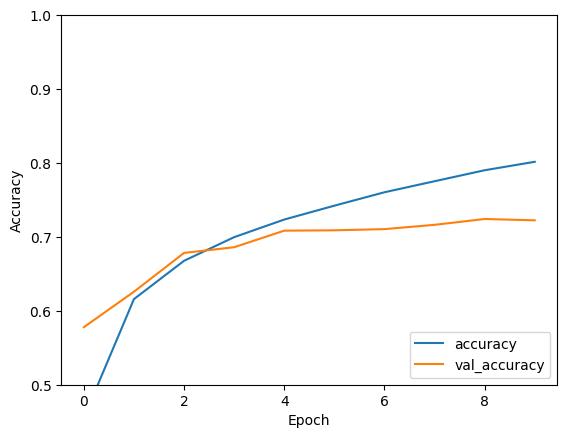

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
